In [1]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Set GPU memory growth for each GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Limit GPU memory usage to 60% of total memory
        for gpu in gpus:
            tf.config.experimental.set_virtual_device_configuration(
                gpu,
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=0.6)])
        
        # Your model training code goes here
        
    except RuntimeError as e:
        print(e)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model



In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [13]:
BATCH_SIZE = 16
IMAGE_SIZE = (224, 224)
CHANNELS = 3
EPOCHS = 10

In [14]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [15]:
train_generator = datagen.flow_from_directory(
    'C:/Thesis/Shrinked_data2',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='sparse',  # Update this line
    subset='training'
)


Found 6109 images belonging to 33 classes.


In [16]:
validation_generator = datagen.flow_from_directory(
    'C:/Thesis/Shrinked_data2',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='sparse',  # Update this line
    subset='validation'
)


Found 1524 images belonging to 33 classes.


In [17]:
test_datagen = ImageDataGenerator(
                rescale=1.0/255,
                rotation_range=20,
                width_shift_range=0.2,
                height_shift_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)


In [18]:
test_data_dir = 'C:\Thesis\Test_data'
target_size = (224, 224)
batch_size = 16

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    shuffle=False,  
    class_mode='sparse'
)

Found 846 images belonging to 33 classes.


In [19]:
base_model = VGG19(weights='imagenet', include_top=False)


In [20]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(200, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)


In [21]:
for layer in base_model.layers:
    layer.trainable = False

In [22]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [23]:
history = model.fit(train_generator, epochs=15, validation_data=validation_generator)


Epoch 1/15
382/382 [==============================] - 1468s 4s/step - loss: 2.1652 - accuracy: 0.4159 - val_loss: 1.2865 - val_accuracy: 0.6220
Epoch 2/15
382/382 [==============================] - 1433s 4s/step - loss: 1.0630 - accuracy: 0.6708 - val_loss: 0.9086 - val_accuracy: 0.6988
Epoch 3/15
382/382 [==============================] - 1415s 4s/step - loss: 0.8218 - accuracy: 0.7347 - val_loss: 0.7221 - val_accuracy: 0.7697
Epoch 4/15
382/382 [==============================] - 1406s 4s/step - loss: 0.7026 - accuracy: 0.7687 - val_loss: 0.6729 - val_accuracy: 0.7848
Epoch 5/15
382/382 [==============================] - 1393s 4s/step - loss: 0.6232 - accuracy: 0.7911 - val_loss: 0.5956 - val_accuracy: 0.7959
Epoch 6/15
382/382 [==============================] - 1476s 4s/step - loss: 0.5771 - accuracy: 0.8083 - val_loss: 0.6086 - val_accuracy: 0.7986
Epoch 7/15
382/382 [==============================] - 1426s 4s/step - loss: 0.5474 - accuracy: 0.8149 - val_loss: 0.6264 - val_accuracy:

In [36]:
history

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [38]:
history.history['loss'][:5] # show loss for first 5 epochs


[2.1652064323425293,
 1.063025951385498,
 0.8217763900756836,
 0.7025896310806274,
 0.6232010126113892]

In [39]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Training and Validation Accuracy')

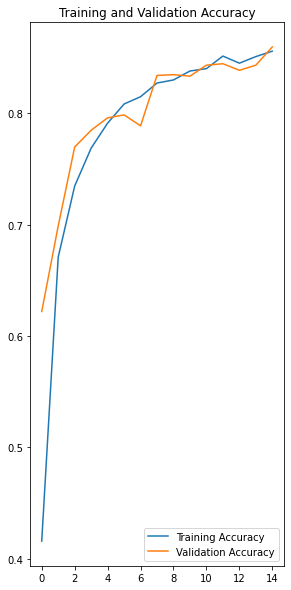

In [40]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

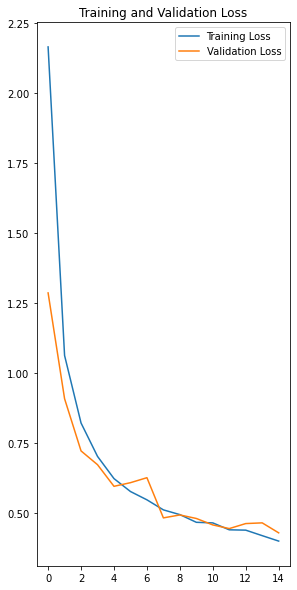

In [41]:
plt.figure(figsize=(10, 10))
EPOCHS = len(loss) # or len(val_loss)
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [42]:
test_loss, test_accuracy = model.evaluate(test_generator)


53/53 [==============================] - 122s 2s/step - loss: 0.4029 - accuracy: 0.8546


In [43]:
test_accuracy

0.8546099066734314

In [44]:
y_true = test_generator.classes


In [45]:
import numpy as np
from sklearn.metrics import classification_report
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1) 
report = classification_report(y_true, y_pred)


53/53 [==============================] - 125s 2s/step


In [46]:
class_mapping = {
    0: 'Apple_Black_Rot',
    1: 'Apple_Cedar_Rust',
    2: 'Apple_Healthy',
    3: 'Apple_Scab',
    4: 'Cherry_Healthy',
    5: 'Cherry_Powdery_Mildew',
    6: 'Corn_Cercospora_Leaf_Spot',
    7: 'Corn_Common_Rust',
    8: 'Corn_Healthy',
    9: 'Corn_Northern_Leaf_Blight',
    10: 'Grape_Black_Rot',
    11: 'Grape_Esca_Black_Measles',
    12: 'Grape_Healthy',
    13: 'Grape_Leaf_Blight',
    14: 'Peach_Bacterial_Spot',
    15: 'Peach_Healthy',
    16: 'Pepper_bell_Bacterial_spot',
    17: 'Pepper_bell_healthy',
    18: 'Potato_Early_blight',
    19: 'Potato_Late_blight',
    20: 'Potato_healthy',
    21: 'Rice_Bacterial_leaf_blight',
    22: 'Rice_Brown_spot',
    23: 'Rice_Leaf_smut',
    24: 'Strawberry_Healthy',
    25: 'Strawberry_Leaf_Scorch',
    26: 'Tomato_Bacterial_spot',
    27: 'Tomato_Early_blight',
    28: 'Tomato_Late_blight',
    29: 'Tomato_Leaf_Mold',
    30: 'Wheat_Healthy',
    31: 'Wheat_Septoria',
    32: 'Wheat_Stripe_Rust'
}

precision = [1.00, 0.97, 0.91, 0.94, 1.00, 0.91, 0.94, 1.00, 1.00, 0.97, 1.00, 0.73, 1.00, 0.97, 1.00, 1.00, 0.83, 1.00, 1.00, 0.97, 0.88, 1.00, 1.00, 1.00, 1.00, 1.00, 0.97, 0.88, 1.00, 0.86, 1.00, 1.00, 1.00]
recall = [0.93, 0.97, 0.97, 0.97, 1.00, 1.00, 0.97, 1.00, 1.00, 0.93, 0.63, 1.00, 0.97, 1.00, 0.93, 0.93, 1.00, 0.83, 0.93, 0.93, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 0.93, 0.73, 1.00, 1.00, 1.00, 1.00, 1.00]
f1_score = [0.97, 0.97, 0.94, 0.95, 1.00, 0.95, 0.95, 1.00, 1.00, 0.95, 0.78, 0.85, 0.98, 0.98, 0.97, 0.97, 0.91, 0.91, 0.97, 0.95, 0.94, 1.00, 1.00, 1.00, 1.00, 1.00, 0.98, 0.90, 0.85, 0.92, 1.00, 1.00, 1.00, 1.00]
support = [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 15, 4, 4, 4, 30, 30, 30, 30, 30, 30, 10, 9, 20]

import pandas as pd

class_names = [class_mapping[i] for i in range(len(precision))]

table_data = []
for i in range(len(precision)):
    table_data.append([class_names[i], precision[i], recall[i], f1_score[i], support[i]])

Classification_Metrics = pd.DataFrame(table_data, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])

Classification_Metrics


,Class,Precision,Recall,F1-Score,Support
0,Apple_Black_Rot,1.00,0.93,0.97,30
1,Apple_Cedar_Rust,0.97,0.97,0.97,30
2,Apple_Healthy,0.91,0.97,0.94,30
3,Apple_Scab,0.94,0.97,0.95,30
4,Cherry_Healthy,1.00,1.00,1.00,30
5,Cherry_Powdery_Mildew,0.91,1.00,0.95,30
6,Corn_Cercospora_Leaf_Spot,0.94,0.97,0.95,30
7,Corn_Common_Rust,1.00,1.00,1.00,30
8,Corn_Healthy,1.00,1.00,1.00,30
9,Corn_Northern_Leaf_Blight,0.97,0.93,0.95,30


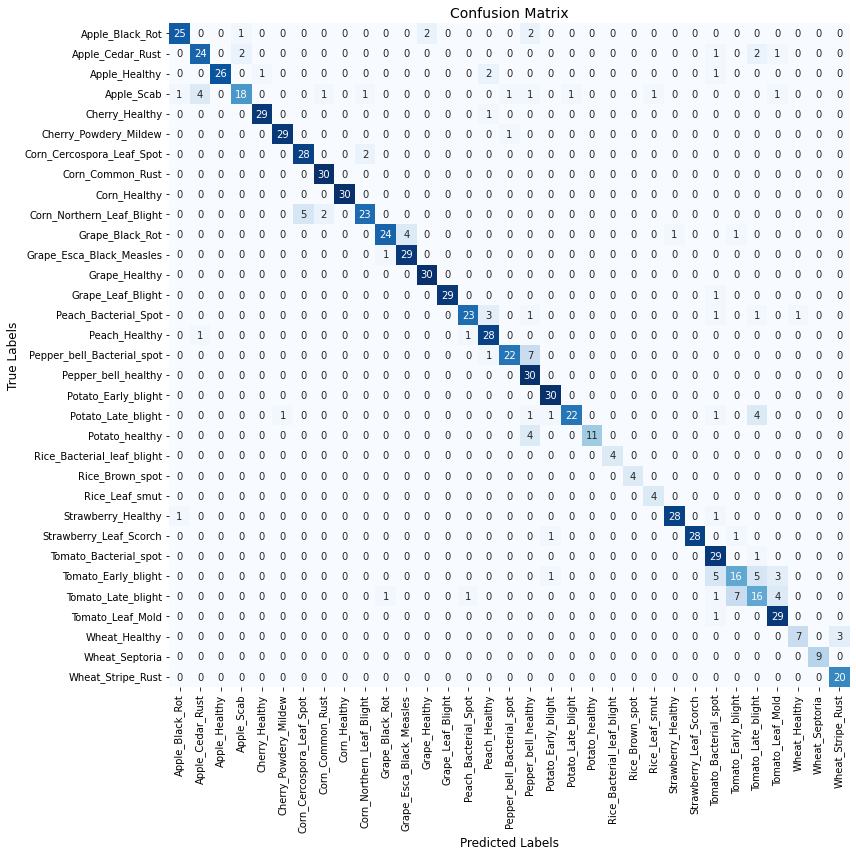

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=ax)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
ax.set_xticklabels(class_names, rotation=90, ha='center')
ax.set_yticklabels(class_names, rotation=0, va='center')

plt.tight_layout()
plt.show()


In [48]:
model.save('C:/Thesis/PlantVillagevgg19.h5')


C:\ProgramData\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
